<a href="https://colab.research.google.com/github/Riky2014/Tesi/blob/main/Software%20verification/Convergence_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
A1 = []
q1 = []

with open('/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/A1_ex.pkl', 'rb') as f:
  A1_ex = pickle.load(f)

file_names = [
    'A1_16.pkl',
    'A1_32.pkl',
    'A1_64.pkl',
    'A1_128.pkl'
]

for file_name in file_names:
    with open(f'/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/{file_name}', 'rb') as f:
        A1.append(pickle.load(f))

with open('/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/q1_ex.pkl', 'rb') as f:
  q1_ex = pickle.load(f)

file_names = [
    'q1_16.pkl',
    'q1_32.pkl',
    'q1_64.pkl',
    'q1_128.pkl'
]

for file_name in file_names:
    with open(f'/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/{file_name}', 'rb') as f:
        q1.append(pickle.load(f))

with open('/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/iter.pkl', 'rb') as f:
  iter = pickle.load(f)

In [15]:
h_ex = 1 / 256
dt_ex = 2e-6

time_step_ex = int(0.1 / dt_ex)
N_ex = int(1 / h_ex)

h_vec = [1 / 16, 1 / 32, 1 / 64, 1 / 128]
dt_vec = [32e-6, 16e-6, 8e-6, 4e-6]

N_vec = [int(1 / h) for h in h_vec]
time_step_vec = [int(0.1 / dt) for dt in dt_vec]

q1_ex_rich = (4 / 3 * np.array([row[::2] for row in q1_ex[::2]]) - 1 / 3 * np.array(q1[3]))
A1_ex_rich = (4 / 3 * np.array([row[::2] for row in A1_ex[::2]]) - 1 / 3 * np.array(A1[3]))

In [16]:
# Error lists for area and flux
err_L2_q_inf = []
err_L2_A_inf = []
err_L2_q_rich_inf = []
err_L2_A_rich_inf = []

# Compute L2 errors
for k in range(len(h_vec)):
    h = h_vec[k]
    dt = dt_vec[k]
    time_step = time_step_vec[k]
    N = N_vec[k]

    max_err_q = 0
    max_err_A = 0
    max_err_q_rich = 0
    max_err_A_rich = 0

    for i in range(time_step):
        sum_q = 0
        sum_A = 0
        sum_q_rich = 0
        sum_A_rich = 0

        for j in range(N + 1):
            sum_q += (q1_ex[i * int(time_step_ex / time_step)][j * int(N_ex / N)] - q1[k][i][j])**2
            sum_A += (A1_ex[i * int(time_step_ex / time_step)][j * int(N_ex / N)] - A1[k][i][j])**2
            sum_q_rich += (q1_ex_rich[i * int(time_step_vec[3] / time_step)][j * int(N_vec[3] / N)] - q1[k][i][j])**2
            sum_A_rich += (A1_ex_rich[i * int(time_step_vec[3] / time_step)][j * int(N_vec[3] / N)] - A1[k][i][j])**2

        err_q = np.sqrt(sum_q * h)  # L2 norm in space at time step i
        err_A = np.sqrt(sum_A * h)  # L2 norm in space at time step i
        err_q_rich = np.sqrt(sum_q_rich * h)  # L2 norm in space at time step i for rich extrapolation
        err_A_rich = np.sqrt(sum_A_rich * h)  # L2 norm in space at time step i for rich extrapolation

        max_err_q = max(max_err_q, err_q)  # Track maximum L2 norm in space over time
        max_err_A = max(max_err_A, err_A)  # Track maximum L2 norm in space over time
        max_err_q_rich = max(max_err_q_rich, err_q_rich)  # Track maximum for rich extrapolation
        max_err_A_rich = max(max_err_A_rich, err_A_rich)  # Track maximum for rich extrapolation

    # L^\infty in time and L^2 in space
    err_L2_q_inf.append(max_err_q)
    err_L2_A_inf.append(max_err_A)
    err_L2_q_rich_inf.append(max_err_q_rich)
    err_L2_A_rich_inf.append(max_err_A_rich)

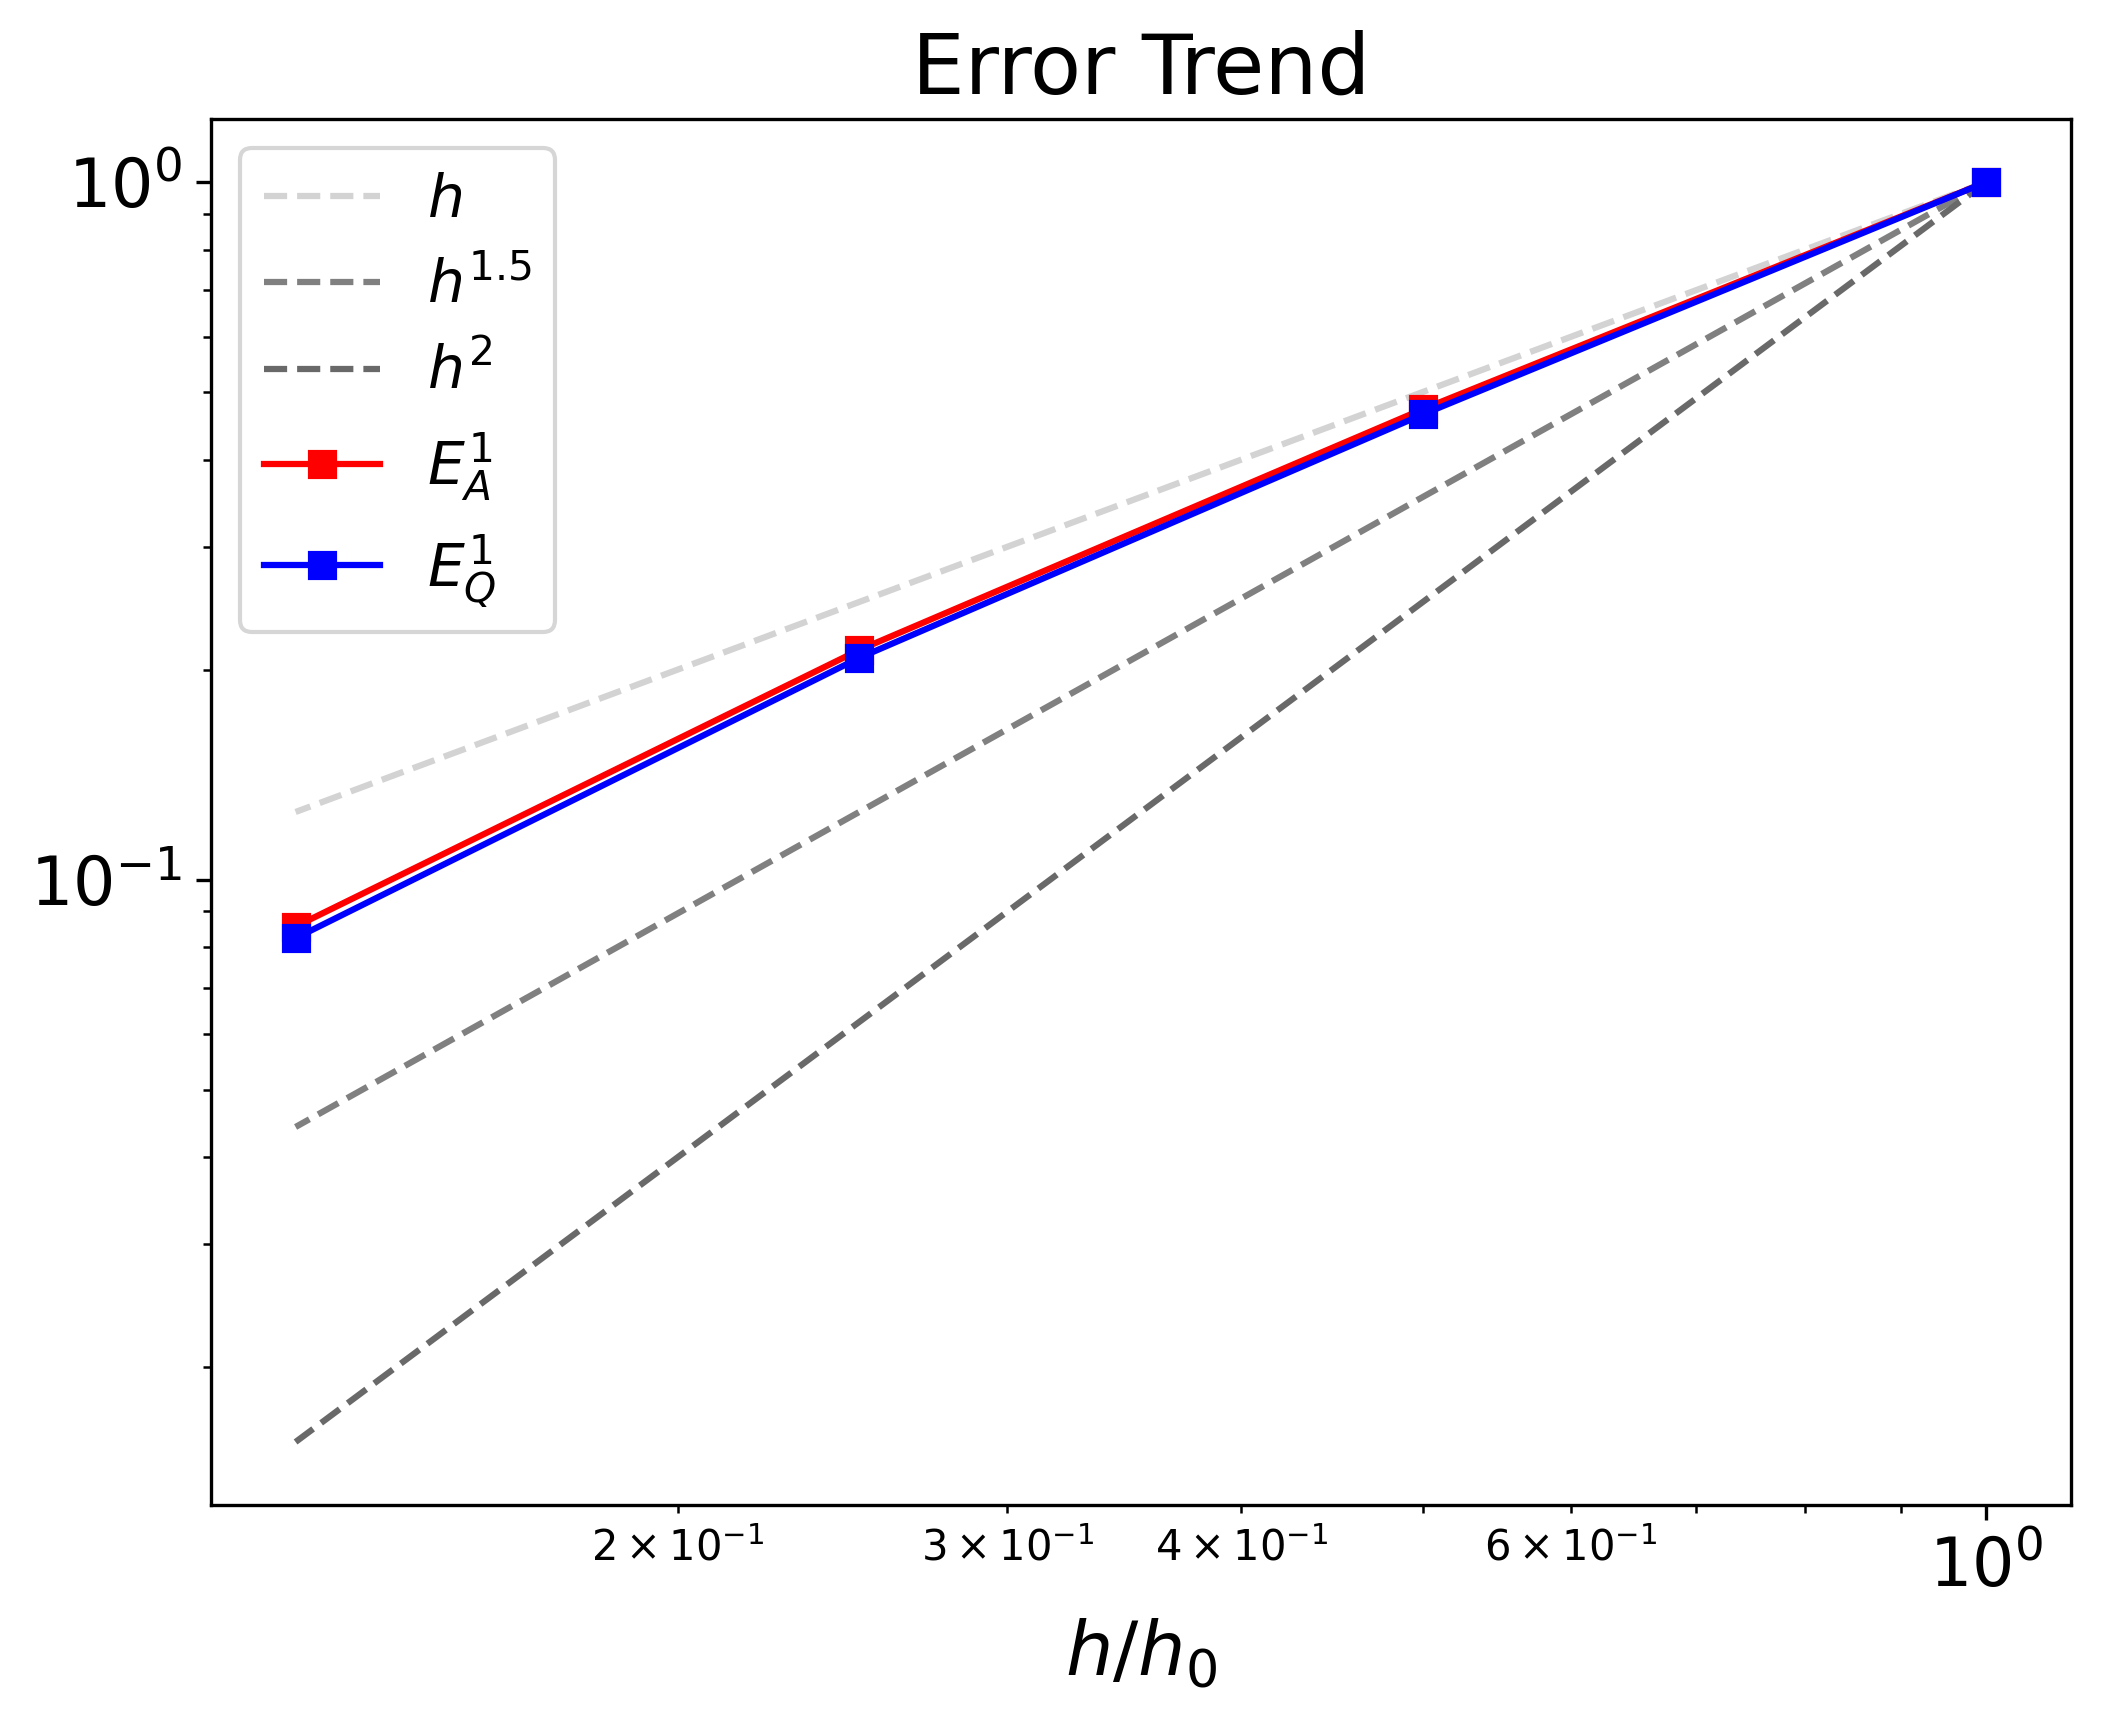

In [17]:
# Normalize x-axis values
x_values = [h / h_vec[0] for h in h_vec]

# Normalize y-axis values for each line
y1_values = [h / h_vec[0] for h in h_vec]
y2_values = [h2 / (h_vec[0]**1.5) for h2 in [h**1.5 for h in h_vec]]
y3_values = [h3 / (h_vec[0]**2) for h3 in [h**2 for h in h_vec]]

# Normalize the errors for plotting
y4_q_values = [err / err_L2_q_inf[0] for err in err_L2_q_inf]
y4_A_values = [err / err_L2_A_inf[0] for err in err_L2_A_inf]

# Richardson extrapolation
y5_q_values = [err / err_L2_q_rich_inf[0] for err in err_L2_q_rich_inf]
y5_A_values = [err / err_L2_A_rich_inf[0] for err in err_L2_A_rich_inf]
# Create subplots for area and flux
fig, axes = plt.subplots(1, 1, figsize=(8, 6), dpi = 300)

# Plotting for flux errors
axes.loglog(x_values, y1_values, color='lightgray', linestyle='--', label='$h$')
axes.loglog(x_values, y2_values, color='gray', linestyle='--', label='$h^{1.5}$')
axes.loglog(x_values, y3_values, color='dimgray', linestyle='--', label='$h^2$')
axes.loglog(x_values, y5_A_values, color='red', marker='s', linestyle='-', label='$E_A^1$')  # L^∞ error with 's' marker
axes.loglog(x_values, y5_q_values, color='blue', marker='s', linestyle='-', label='$E_Q^1$')  # L^∞ error with 's' marker

axes.set_title('Error Trend', fontsize=20)
axes.set_xlabel('$h / h_0$', fontsize=18)

axes.tick_params(labelsize=16)  # Tick labels size

axes.legend(fontsize=14)

# Show the figure
plt.show()

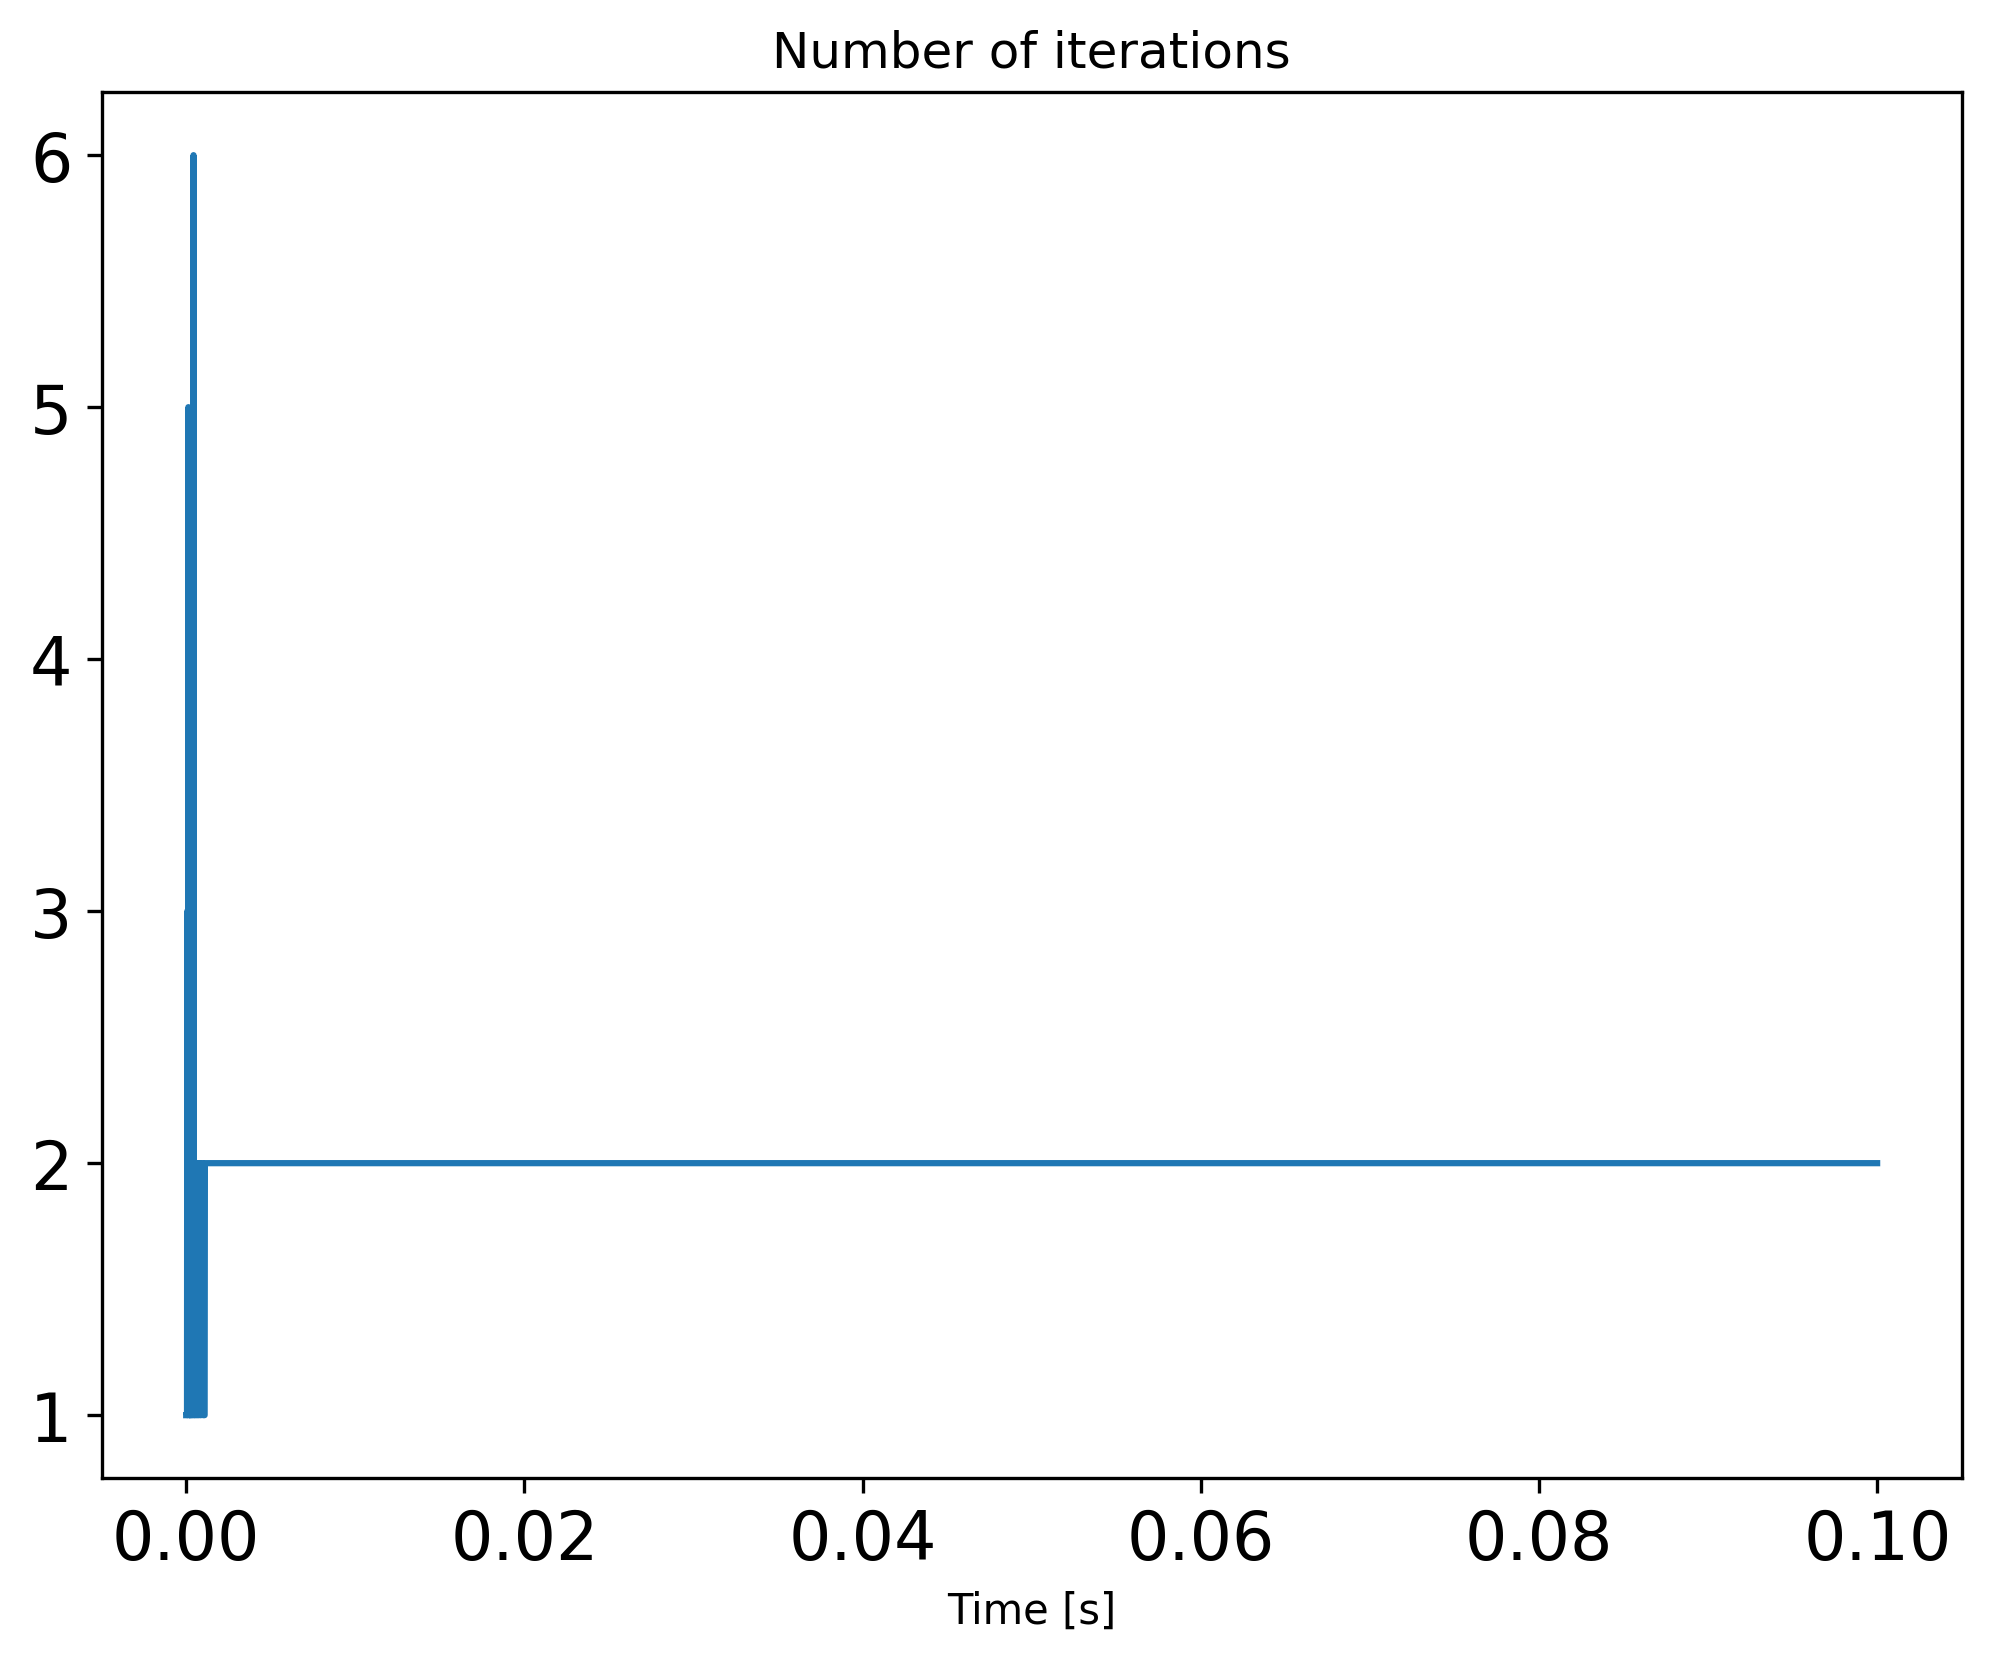

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6), dpi = 300)
times = np.linspace(0, 1, len(iter))
axes.plot(times[:6250], iter[:6250])
axes.set_title('Number of iterations')
axes.set_xlabel('Time [s]')
axes.tick_params(labelsize=16)  # Tick labels size

plt.show()